This notebook examines aviation accident data to assess the risk of fatal and severe accidents across several key factors, including:

1. Flight Phases: Takeoff, landing, maneuvering, etc.
2. Weather Conditions: Impact of weather (e.g., rain, fog, wind) on accidents.
3. Aircraft and Engine Types: Model, make, and number of engines.
4. Purpose of Flight: Commercial, private, training, etc.
5. Accident Severity: Categorized into fatal, serious, and minor injuries.

By analyzing these factors, the goal is to uncover trends and provide actionable recommendations for our company that is expanding into new industries to diversify its portfolio. This analysis uses data from the National Transportation Safety Board (NTSB), covering civil aviation accidents from 1962 to 2023 in the United States and international waters.

## Step 1: Import libraries
Firstly, we import all the necessary libraries required for data manipulation, analysis, and visualization. These libraries will help with data cleaning, statistical operations, and visual representation of results.

In [1]:
# --- Import libraries and loading dataset ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Use 'ggplot' style for more visually appealing plots
plt.style.use('ggplot')

# Step 2: Load the dataset
Here, we load the 'Aviation data' -a CSV file into a pandas DataFrame. This dataset contains the aviation accident data that we will analyze for risk patterns across various factors.

In [2]:
df = pd.read_csv('data\Aviation_Data.csv', low_memory=False) 
df.head() 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Step 3: Understand the structure of the dataset
After loading the dataset, it is important to perform a few basic checks to understand its structure, identify any missing values, and ensure that the data types are correct. 

We will perform the following checks:
1. Shape of the dataset: To check the number of rows and columns.
2. Columns: To list all column names and ensure the dataset has the expected structure.
3. Preview the first 20 rows and check the content.
4. Data types: To confirm that numerical columns are correctly identified
5. Dataset summary: To get a quick overview of data types and missing values.
6. Missing values: To check if any columns contain missing values.

These checks will help us assess the quality of the dataset and prepare it for further analysis.

In [4]:
df.shape  # Returns (number of rows (90348), number of columns(31))

(90348, 31)

In [5]:
df.columns # List all column names to inspect the dataset structure

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
df.head(20) # Display the first 20 rows to preview the data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [7]:
df.info() # Dataset summary: data types, non-null counts, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
df.describe() # Summary statistics for numerical columns

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
df.dtypes # Check the data types of each column

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

## Step 4: Data cleaning (Handling missing values and duplicates)
We will:
1. Identify missing values: We will check which columns contain missing values and the number of missing entries.
2. Drop rows with missing `Event.Id`: Since `Event.Id` is the main unique identifier, it’s crucial that this column has no missing values.
3. Check for duplicates: We will identify and remove any duplicate rows based on `Event.Id`, ensuring each event is represented only once.

These steps are necessary to clean the dataset before performing any further analysis.

In [10]:
# --- Check columns with missing values
df.isnull().sum().sort_values(ascending=False)  # List missing values per column

#Schedule, Air.carrier, and FAR.Description columns have the most missing values, while Event.Id, Event.Date, and Investigation.Type have the least missing data, each with only 1,459 missing entries.

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

In [11]:
# --- Check how many `Event.Id` row values are missing
df['Event.Id'].isna().sum()  # 1,459 missing values in the Event.Id column and we need to drop them

1459

In [12]:
# --- Drop rows where `Event.Id` is missing (since it's the main unique identifier)
df = df.dropna(subset=['Event.Id'])

In [13]:
# --- Confirm the shape of dataframe after dropping rows with missing `Event.Id`
df.shape  # # Returns (number of rows ((88889), number of columns(31))

(88889, 31)

In [14]:
# --- Check for duplicate `Event.Id` values
duplicate_ids = df['Event.Id'].duplicated().sum()    #938 duplicate values in the Event.Id column and we need to drop them
duplicate_ids

938

In [15]:
# --- Remove duplicates present in the `Event.Id` column
df = df.drop_duplicates(subset=['Event.Id'])

In [16]:
# --- Confirm the new shape and uniqueness of `Event.Id` and the broader df
print(df.shape)   #the new rows are 87951 and 31 columns
print(df['Event.Id'].duplicated().sum())  #no duplicates in our unique identifier column

(87951, 31)
0


In [ ]:
# -- Handling placeholders
placeholders = ['Unk', 'UNK', 'LR', 'N/A', 'na', 'nan', '-', 'None', 'NONE']
df = df.replace(placeholders, 'Unknown')

# Fill remaining missing values with 'unknown'
df = df.fillna('Unknown')

In [24]:
df.info()  # Check the current dataset structure (data types and non-null counts)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                87951 non-null  object
 1   Investigation.Type      87951 non-null  object
 2   Accident.Number         87951 non-null  object
 3   Event.Date              87951 non-null  object
 4   Location                87951 non-null  object
 5   Country                 87951 non-null  object
 6   Latitude                87951 non-null  object
 7   Longitude               87951 non-null  object
 8   Airport.Code            87951 non-null  object
 9   Airport.Name            87951 non-null  object
 10  Injury.Severity         87951 non-null  object
 11  Aircraft.damage         87951 non-null  object
 12  Aircraft.Category       87951 non-null  object
 13  Registration.Number     87951 non-null  object
 14  Make                    87951 non-null  object
 15  Mo

## Step 5: Data manipulation (Create a new DF copy with only useful columns)
This is meant to keep things simple for the analysis.

In [ ]:
# -- Create a working copy with the most useful columns
use_cols = [
    'Event.Id', 'Event.Date','Make','Model','Aircraft.damage','Amateur.Built','Country',
    'Number.of.Engines','Engine.Type','Purpose.of.flight',
    'Weather.Condition','Broad.phase.of.flight','Report.Status',
    'Total.Fatal.Injuries','Total.Serious.Injuries',
    'Total.Minor.Injuries','Total.Uninjured'
]

# -- Create the working dataframe
df_final = df[use_cols].copy()

# -- Look at what we kept-ie final dataset
df_final.shape

(87951, 17)

In [ ]:
# -- Clean the event date column and create a “year” column
# Purpose is to ensure the date column is in datetime format and then extract the year

# convert event.date to datetime; errors='coerce' will replace bad dates with NaT (missing)
df_final['Event.Date'] = pd.to_datetime(df_final['Event.Date'], errors='coerce')

# create a new column that contains only the year number (as integer)
df_final['year'] = df_final['Event.Date'].dt.year.astype('Int64')  # keeps NaN if any

# check to confirm it worked
df_final[['Event.Date', 'year']].head(10)

,Event.Date,year
0,1948-10-24,1948
1,1962-07-19,1962
2,1974-08-30,1974
3,1977-06-19,1977
4,1979-08-02,1979
5,1979-09-17,1979
6,1981-08-01,1981
7,1982-01-01,1982
8,1982-01-01,1982
9,1982-01-01,1982


In [32]:
# -- Clean a few text columns (eg make/model/purpose/weather/phase)
# -- Goal is to make sure text values like make, model, weather etc. are neat and have consistent spacing


cols_to_clean = ['Make','Model','Country','Purpose.of.flight',                         # list of text columns we want to clean
                 'Weather.Condition','Broad.phase.of.flight','Aircraft.damage']

for col in cols_to_clean:
    
    df_final[col] = df_final[col].astype(str)                             # convert values to string type
    df_final[col] = df_final[col].str.strip()                             # remove extra spaces before/after text
    df_final[col] = df_final[col].str.replace('  ', ' ')              # replace double spaces with single space                                         
    df_final[col] = df_final[col].str.upper()                             # convert to uppercase so same words look alike (e.g., 'personal' = 'PERSONAL')

df_final[['Make','Model','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight']].head(10)

,Make,Model,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight
0,STINSON,108-3,PERSONAL,UNKNOWN,CRUISE
1,PIPER,PA24-180,PERSONAL,UNKNOWN,UNKNOWN
2,CESSNA,172M,PERSONAL,IMC,CRUISE
3,ROCKWELL,112,PERSONAL,IMC,CRUISE
4,CESSNA,501,PERSONAL,VMC,APPROACH
5,MCDONNELL DOUGLAS,DC9,UNKNOWN,VMC,CLIMB
6,CESSNA,180,PERSONAL,IMC,UNKNOWN
7,CESSNA,140,PERSONAL,VMC,TAKEOFF
8,CESSNA,401B,BUSINESS,IMC,LANDING
9,NORTH AMERICAN,NAVION L-17B,PERSONAL,IMC,CRUISE


## Step 6: Exploring general patterns

Here we will try to understand how aviation accidents have changed over time and to identify any clear patterns in the data, highlighting how accident frequency and severity have evolved

We will start by analyzing the number of accidents per year, then look at additional high-level patterns such as fatality rates, purpose of flight, weather conditions, and aircraft make.

In [36]:
# -- Number of accidents each year


accidents_per_year = df_final['year'].value_counts().sort_index()
accidents_per_year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3547
1983    3513
1984    3406
1985    3053
1986    2832
1987    2773
1988    2685
1989    2502
1990    2480
1991    2420
1992    2328
1993    2285
1994    2229
1995    2278
1996    2150
1997    2121
1998    2196
1999    2174
2000    2183
2001    2032
2002    2001
2003    2063
2004    1932
2005    2001
2006    1826
2007    1984
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1581
Name: year, dtype: Int64

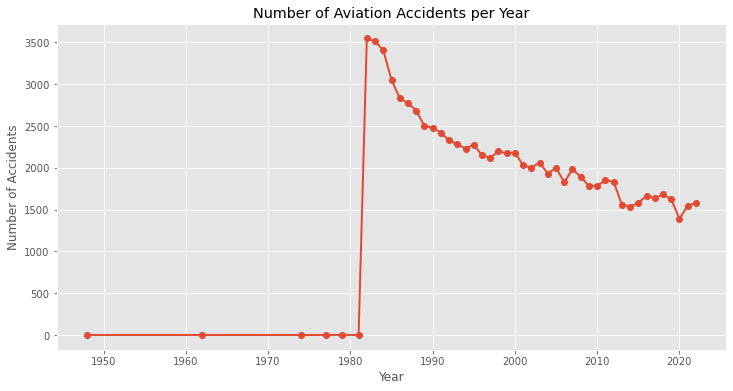

In [42]:
# -- plot
accidents_per_year = (
    df_final.dropna(subset=['year'])
            .groupby('year')['Event.Id'].count()
            .reset_index()
)
accidents_per_year['year'] = accidents_per_year['year'].astype(int)

plt.figure(figsize=(12,6))
plt.plot(accidents_per_year['year'], accidents_per_year['Event.Id'], marker='o', linewidth=2)
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year'); plt.ylabel('Number of Accidents'); plt.grid(True)
plt.show()

#The graph confirms that:
# 1. The number of accidents was very high in the 1980s, exceeding 3,000 accidents per year, but has steadily declined since then.
# 2. Accident frequency has halved since the 1980s.
# 3. Aviation has become progressively safer, even as global air traffic has increased dramatically.
# The analysis will therefore focus on data from 1982 onward, where records are more complete and meaningful for business recommendations.

In [ ]:
#  -- Plot on accident severity (Fatal vs. Non-Fatal) over time

## Step 7: Data analysis

We are now going to create two new columns that will make it easy to measure accident severity:
   - `total_injuries` – total people hurt in an event.
   - `is_fatal` – flag if anyone died (1 = yes).
   - `is_severe` – flag if fatal or serious injuries occurred.

With the above we can finally, calculate **overall fatal and severe accident rates** against key factors such as;
    Phase of flight, 
    Weather condition, 
    Make and model of aircraft, 
    Engine type, 
    Purpose of flight, 
    Number of engines

In [44]:
# -- Creating two new columns that are necessary to help us measure accident severity

# -- 1. Total_injuries – Total number of people hurt in that accident. It adds up all types of injuries: fatal + serious + minor injuries.
# -- 2. is_fatal – shows whether anyone died in the accident. It checks if Total.Fatal.Injuries > 0
      #-> 1 means yes, at least one person died.
      #-> 0 means no deaths occurred.
# -- 3. is_severe – shows whether the accident was serious (someone died or had serious injuries). It checks if (Total.Fatal.Injuries + Total.Serious.Injuries) > 0.
      #-> 1 means the accident was severe.
      #-> 0 means there were no serious injuries or deaths.

injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for column in injury_columns:
    df_final[column] = pd.to_numeric(df_final[column], errors='coerce').fillna(0)

# create helper flags
# 'is_fatal' = 1 if any fatalities happened, else 0
# 'is_severe' = 1 if there were fatalities or serious injuries, else 0

df_final['is_fatal'] = (df_final['Total.Fatal.Injuries'] > 0).astype(int)
df_final['is_severe'] = (
    (df_final['Total.Fatal.Injuries'] + df_final['Total.Serious.Injuries']) > 0
).astype(int)

# quick check to confirm
df_final[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'is_fatal', 'is_severe']].head()

,Total.Fatal.Injuries,Total.Serious.Injuries,is_fatal,is_severe
0,2.0,0.0,1,1
1,4.0,0.0,1,1
2,3.0,0.0,1,1
3,2.0,0.0,1,1
4,1.0,2.0,1,1


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87951 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Event.Date              87951 non-null  datetime64[ns]
 2   Make                    87951 non-null  object        
 3   Model                   87951 non-null  object        
 4   Aircraft.damage         87951 non-null  object        
 5   Amateur.Built           87951 non-null  object        
 6   Country                 87951 non-null  object        
 7   Number.of.Engines       87951 non-null  object        
 8   Engine.Type             87951 non-null  object        
 9   Purpose.of.flight       87951 non-null  object        
 10  Weather.Condition       87951 non-null  object        
 11  Broad.phase.of.flight   87951 non-null  object        
 12  Report.Status           87951 non-null  object

In [46]:
# check missing values across all six main analytical themes
theme_cols = [
    'Broad.phase.of.flight', 
    'Weather.Condition', 
    'Make', 
    'Engine.Type', 
    'Purpose.of.flight', 
    'Number.of.Engines'
]

df_final[theme_cols].isna().sum()

Broad.phase.of.flight    0
Weather.Condition        0
Make                     0
Engine.Type              0
Purpose.of.flight        0
Number.of.Engines        0
dtype: int64

## Theme 1: Phase of flight vs. accident severity
This analysis examines how accident severity varies across different phases of flight - such as takeoff, climb, cruise, approach, and landing.
The goal is to identify which phases are most prone to fatal or severe accidents.
We will use the is_fatal and is_severe flags to calculate:
1. Total accidents per flight phase
2. Fatal rate (share of accidents with at least one death)
3. Severe rate (share of accidents with at least one death or serious injury)

In [ ]:
fight_phase_risk = (
    df_final.groupby('Broad.phase.of.flight', dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .sort_values('severe_rate', ascending=False)
)

fight_phase_risk

,total_accidents,fatal_rate,severe_rate
Broad.phase.of.flight,,,
MANEUVERING,8052,0.387606,0.531918
OTHER,116,0.379310,0.456897
CLIMB,1995,0.299248,0.451629
DESCENT,1870,0.242246,0.395722
APPROACH,6389,0.240257,0.392080
UNKNOWN,27661,0.237555,0.387838
CRUISE,10141,0.267331,0.387043
STANDING,872,0.118119,0.349771
GO-AROUND,1345,0.196283,0.340520


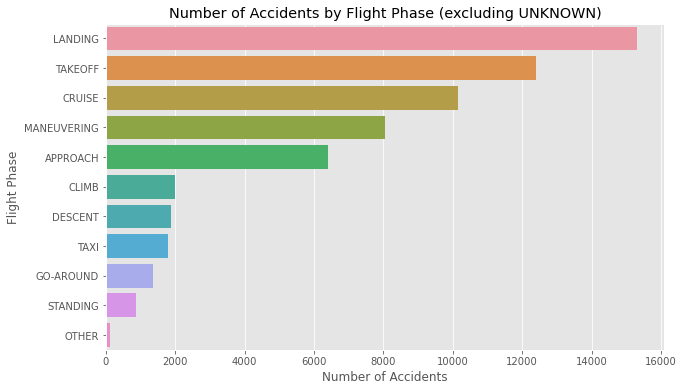

In [ ]:
# --plot (accidents by flight phase ) excluding UNKNOWN or NaN phases
phase_counts = (
    df_final.loc[~df_final['Broad.phase.of.flight'].isin(['UNKNOWN', 'Unknown', 'NaN'])]
    ['Broad.phase.of.flight']
    .value_counts()
)

# plot again
plt.figure(figsize=(10,6))
sns.barplot(y=phase_counts.index, x=phase_counts.values, orient='h')
plt.title('Number of Accidents by Flight Phase (excluding UNKNOWN)')
plt.xlabel('Number of Accidents')
plt.ylabel('Flight Phase')
plt.show()

## Results show that:
#1. Landing, cruise and takeoff have the highest number of accidents (about 40% of all accidents). but with low fatal and severe rates — fatal rates as low as 1.8% for Landing.
#2. Maneuvering and climb show fewer accidents overall, 9% and 2%, respectively), but these are high-risk phases, with fatal rates as high as 38.8% in Maneuvering.
#3. Descent and approach also have moderate levels of severity, but their accident frequencies are relatively lower.
#Operational safety measures should be enhanced for phases with high severity, even if their frequency is lower (e.g., climb, maneuvering).
#Safety improvements should target the Maneuvering and Climb phases, where the risk of fatal accidents is the highest despite their lower frequency


## Theme 2: weather conditions vs. accident severity
We will analyse accident risk by weather condition to:
1. To check if accidents are more likely to be fatal or severe in poor weather.
2. This identifies environmental risks that the aviation business must prepare for.

In [69]:
weather_risk = (
    df_final.groupby('Weather.Condition', dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .sort_values('severe_rate', ascending=False)
)

# convert rates to percentages for easier interpretation
weather_risk[['fatal_rate', 'severe_rate']] = weather_risk[['fatal_rate', 'severe_rate']] * 100
weather_risk = weather_risk.round({'fatal_rate': 2, 'severe_rate': 2})

weather_risk

#Results explanation
# 1. IMC (bad weather conditions): The highest fatal rate (58.13%) and severe rate (68.65%), indicating that poor weather significantly increases the risk of severe accidents.
# 2. VMC (clear weather): Fatal rate of 15.68% and severe rate of 28.95%, showing that even in good weather, accidents still occur, but with lower severity compared to poor weather.
# 3. The aviation business should pay special attention to IMC conditions, where the risk of severe accidents is significantly higher.

,total_accidents,fatal_rate,severe_rate
Weather.Condition,,,
IMC,5949,58.13,68.65
UNKNOWN,5585,37.33,44.10
VMC,76417,15.68,28.95


<Figure size 720x432 with 0 Axes>

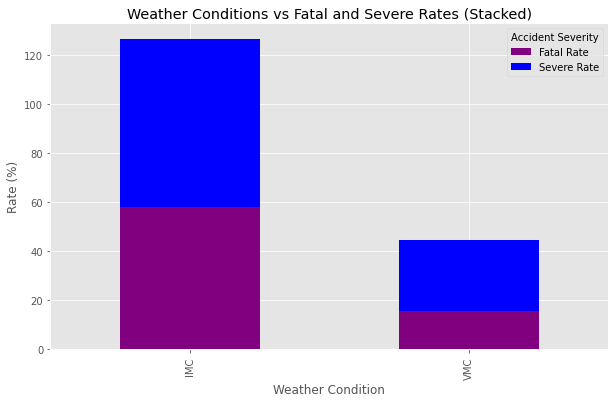

In [73]:
# --plot (accidents by weather conditions ) -excluding "UNKNOWN"
weather_risk_clean = weather_risk.drop(index='UNKNOWN')

# Plot the results
plt.figure(figsize=(10,6))
weather_risk_clean[['fatal_rate', 'severe_rate']].plot(kind='bar', stacked=True, color=['purple', 'blue'], figsize=(10,6))

plt.title('Weather Conditions vs Fatal and Severe Rates (Stacked)')
plt.xlabel('Weather Condition')
plt.ylabel('Rate (%)')
plt.legend(title='Accident Severity', labels=['Fatal Rate', 'Severe Rate'])
plt.show()


## Theme 3: analyze accident severity by aircraft make and model
We will analyse accident risk by aircraft make and model to:
1. To check which aircraft types have higher or lower accident severity,
2. T0 guiding safer investment decisions in aircrafts

In [81]:
# -- group by aircraft make and model
aircraft_risk = (
    df_final.groupby(['Make', 'Model'], dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .reset_index()
)

aircraft_risk[['fatal_rate', 'severe_rate']] = aircraft_risk[['fatal_rate', 'severe_rate']] * 100    # convert fatal and severe rates into percentages
aircraft_risk = aircraft_risk[aircraft_risk['total_accidents'] >= 30]        # filter to only include aircraft types with at least 30 accidents (to remove rare outliers)
aircraft_risk_sorted = aircraft_risk.sort_values('severe_rate', ascending=False)  # sort by severe rate, descending (most risky first)

top_risky_aircraft = aircraft_risk_sorted.head(10)       # Top 10 riskiest aircraft based on severe rate
top_safe_aircraft = aircraft_risk_sorted.tail(10)    # Bottom 10 safest aircraft based on severe rate

# Display top 10 riskiest and safest aircraft
print("Top 10 riskiest aircraft types:")
display(top_risky_aircraft)

print("\nTop 10 safest aircraft types:")
display(top_safe_aircraft)


Top 10 riskiest aircraft types:


,Make,Model,total_accidents,fatal_rate,severe_rate
13557,PIPER,PA25,36,66.666667,75.000000
11943,MITSUBISHI,MU-2B-60,30,63.333333,73.333333
14594,ROBINSON,R44 II,33,45.454545,69.696970
5307,CESSNA,T337G,31,51.612903,67.741935
1728,BALLOON WORKS,FIREFLY 7,39,7.692308,64.102564
729,AIR TRACTOR,AT502,39,43.589744,61.538462
2393,BEECH,P35,35,34.285714,60.000000
14563,ROBINSON,R-44,46,52.173913,58.695652
2061,BEECH,A36TC,74,40.540541,58.108108
8668,GRUMMAN AMERICAN,AA-5,31,45.161290,58.064516



Top 10 safest aircraft types:


,Make,Model,total_accidents,fatal_rate,severe_rate
828,AIRBUS,A320,85,4.705882,7.058824
4693,CESSNA,180A,57,3.508772,7.017544
6951,EAGLE AIRCRAFT CO.,DW-1,30,3.333333,6.666667
3435,BOEING,777,91,0.000000,6.593407
13225,PIPER,PA-18-160,31,3.225806,6.451613
16570,SWEARINGEN,SA226TC,31,6.451613,6.451613
8711,GRUMMAN-SCHWEIZER,G-164A,50,0.000000,6.000000
2242,BEECH,C-23,34,2.941176,5.882353
1906,BEECH,1900D,54,5.555556,5.555556
3254,BOEING,737-800,31,0.000000,3.225806


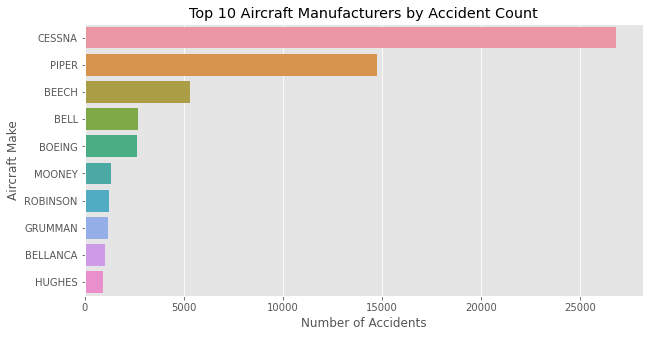

In [92]:
# top 10 aircraft makes
make_counts = df_final['Make'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=make_counts.values, y=make_counts.index)
plt.title('Top 10 Aircraft Manufacturers by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Make')
plt.show()


## Theme 4: analyze accident severity by purpose of flight
We will analyse accident risk by aircraft make and model to:
1. to help identify which flight operations (personal, business, training, etc.) carry higher or lower risk
2. to help guide what kind of aviation activities are safer for a new business to pursue.

In [94]:
purpose_risk = (
    df_final.groupby('Purpose.of.flight', dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .sort_values('severe_rate', ascending=False)
)

# convert to percentages for easier reading
purpose_risk[['fatal_rate', 'severe_rate']] = purpose_risk[['fatal_rate', 'severe_rate']] * 100
purpose_risk = purpose_risk.round({'fatal_rate': 2, 'severe_rate': 2})

purpose_risk

,total_accidents,fatal_rate,severe_rate
Purpose.of.flight,,,
ASHO,5,60.00,80.00
AIR RACE/SHOW,53,45.28,77.36
FIREFIGHTING,40,47.50,60.00
AIR RACE SHOW,99,39.39,52.53
SKYDIVING,181,32.04,49.17
GLIDER TOW,53,26.42,47.17
AERIAL OBSERVATION,787,28.08,47.01
AIR DROP,11,27.27,45.45
BANNER TOW,101,15.84,43.56


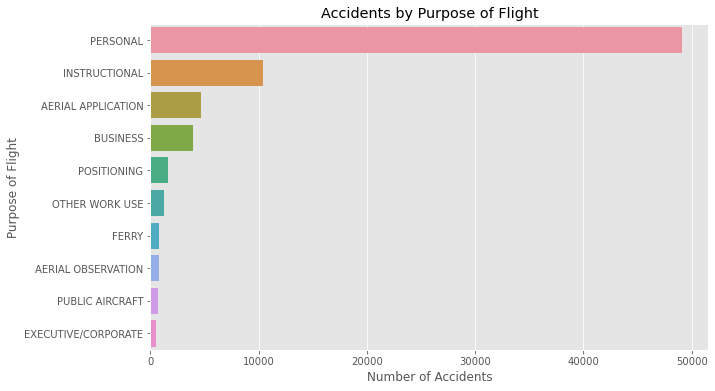

In [123]:
# -- plot (Accidents by purpose of flight)
df_cleaned = df_final[df_final['Purpose.of.flight'] != 'UNKNOWN']    # Remove 'UNKNOWN' from 'Purpose.of.flight' column

purpose_counts = df_cleaned['Purpose.of.flight'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=purpose_counts.index, x=purpose_counts.values, orient='h')
plt.title('Accidents by Purpose of Flight')
plt.xlabel('Number of Accidents')
plt.ylabel('Purpose of Flight')
plt.show()

#High accident frequency does not necessarily correlate with high severity. PERSONAL flights have the highest number of accidents, but their fatal and severe rates are much lower than high-risk activities like AIR RACE/SHOW and FIREFIGHTING, which have fewer accidents but significantly higher severity. 
#High-risk operations like ASHO and FIREFIGHTING may have fewer accidents but much higher fatal and severe rates, suggesting that the severity of accidents can be disproportionate to the frequency of those operation
#Given the analysis, the recommendation is to focus on commercial operations such as PERSONAL and INSTRUCTIONAL flights, as they offer higher frequency with lower severity rates, ensuring a safer and more sustainable business mode

## Theme 5: analyze accident severity by engine type
We will analyse accident risk by aircraft engine type to:
1. to help identify whether engine type often reflects the design and performance class of an aircraft.
2. to help understand the severity by engine type helps guide safe investment decisions in technology.

In [ ]:
engine_risk = (
    df_final.groupby('Engine.Type', dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .sort_values('severe_rate', ascending=False)
)

# convert to percentages for readability
engine_risk[['fatal_rate', 'severe_rate']] = engine_risk[['fatal_rate', 'severe_rate']] * 100
engine_risk = engine_risk.round({'fatal_rate': 2, 'severe_rate': 2})

engine_risk

,total_accidents,fatal_rate,severe_rate
Engine.Type,,,
Hybrid Rocket,1,100.00,100.00
Unknown,9065,29.62,44.36
Turbo Shaft,3583,21.88,37.76
Turbo Jet,684,19.15,34.50
Turbo Prop,3324,23.80,33.63
Reciprocating,68885,18.79,30.96
Electric,10,20.00,30.00
Turbo Fan,2387,7.88,25.43
Geared Turbofan,12,0.00,0.00


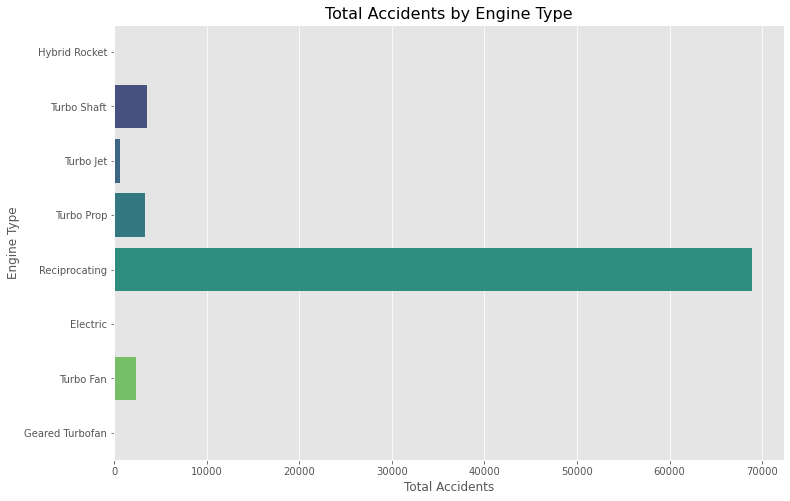

In [ ]:
# -- plot (Accidents by engine type)

engine_risk = engine_risk.reset_index(drop=True)

engine_risk['Engine.Type'] = engine_risk['Engine.Type'].astype(str)
engine_risk_clean = engine_risk[~engine_risk['Engine.Type'].str.contains('unknown', case=False, na=False)]      # Remove rows where 'Engine.Type' is 'Unknown', 'unknown', or NaN

plt.figure(figsize=(12,8))     # Plot total accidents by engine type (excluding 'Unknown')
sns.barplot(x='total_accidents', y='Engine.Type', data=engine_risk_clean, palette='viridis')
plt.title('Total Accidents by Engine Type', fontsize=16)
plt.xlabel('Total Accidents', fontsize=12)
plt.ylabel('Engine Type', fontsize=12)
plt.show()

#Results
# 1. High-frequency, low-severity engines: Reciprocating engines, though involved in the most accidents, tend to have lower fatal and severe outcomes, which makes them more manageable for operational safety.
# 2. High-risk engines: Turbo Shaft and Turbo Prop engines, although less frequent, have higher fatal and severe rates, signaling a higher potential risk when accidents occur.
#3. High-risk engines: Turbo Shaft and Turbo Prop engines, although less frequent, have higher fatal and severe rates, signaling a higher potential risk when accidents occur.
# For fleet expansion: Prioritize engines like Reciprocating (high frequency, lower severity) for increased reliability and safety.
# For improving safety protocols: Focus on Turbo Shaft and Turbo Prop engines, as these have higher fatal and severe accident rates, despite being less frequent.


## Theme 6: analyze accident severity by number of engines
We will analyse accident risk by aircraft engine type to:
1. to help identify whether number of engines often reflects the design and performance class of an aircraft.
2. to help understand the severity by number of engines helps guide safe investment decisions in technology.

In [124]:
# analyze severity by number of engines
number_of_engines_risk = (
    df_final.groupby('Number.of.Engines', dropna=False)
    .agg(
        total_accidents=('is_fatal', 'size'),
        fatal_rate=('is_fatal', 'mean'),
        severe_rate=('is_severe', 'mean')
    )
    .sort_values('severe_rate', ascending=False)
)

# convert to percentages for easier interpretation
number_of_engines_risk[['fatal_rate', 'severe_rate']] = (
    number_of_engines_risk[['fatal_rate', 'severe_rate']] * 100
)
number_of_engines_risk = number_of_engines_risk.round({'fatal_rate': 2, 'severe_rate': 2})

number_of_engines_risk

,total_accidents,fatal_rate,severe_rate
Number.of.Engines,,,
8.0,3,0.00,66.67
Unknown,6027,33.73,46.01
0.0,1210,13.31,39.92
2.0,10891,24.85,35.63
1.0,68956,18.21,30.93
4.0,415,12.77,24.58
3.0,448,4.24,22.32
6.0,1,0.00,0.00


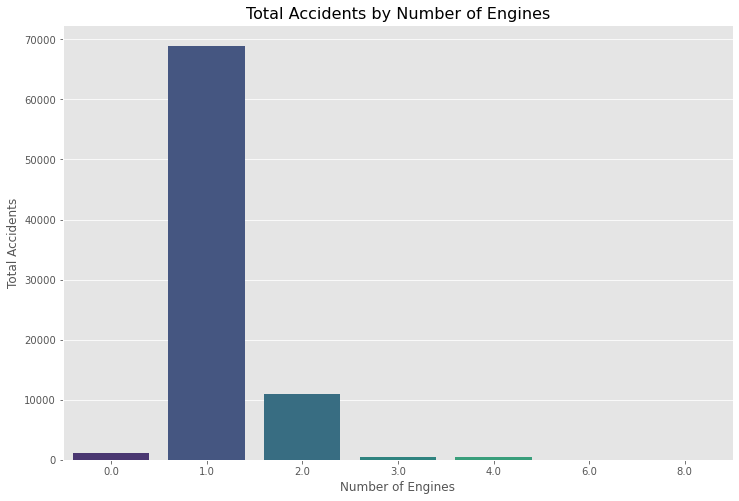

In [ ]:
# -- plot (Accidents by engine type)
number_of_engines_risk_clean = number_of_engines_risk.reset_index()

number_of_engines_risk_clean = number_of_engines_risk_clean[number_of_engines_risk_clean['Number.of.Engines'] != 'Unknown']    ## Remove rows where 'Number.of.Engines' is 'Unknown' (if needed)
plt.figure(figsize=(12,8))
sns.barplot(x='Number.of.Engines', y='total_accidents', data=number_of_engines_risk_clean, palette='viridis')
plt.title('Total Accidents by Number of Engines', fontsize=16)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Total Accidents', fontsize=12)
plt.show()

#Results
# 1. Aircraft with 1 engine have the highest accident frequency (68,956 accidents), with a moderate fatal rate of 18.21% and severe rate of 30.93%.
# 2-engine aircraft show higher severity, with 10,891 accidents, a fatal rate of 24.85%, and severe rate of 35.63%.
# 3-engine aircraft have fewer accidents (448) but lower severity (fatal rate 4.24%, severe rate 22.32%). 
# Aircraft with 4 engines show moderate severity (fatal rate 12.77%, severe rate 24.58%), 
# while 6-engine aircraft have an outlier with only 1 accident. 
#Focus on improving safety protocols for 2-engine aircraft, as they show both moderate accident frequency and higher severity rates.
#Continue monitoring 1-engine aircraft for safety, given their high accident frequency, while ensuring that safety measures are in place to mitigate severity.
